<a href="https://colab.research.google.com/github/k-ritika/Caption-generator-project/blob/main/spotify_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import duckdb
import pandas as pd
import warnings
#✅ Suppress UserWarnings (e.g., from pandas with DuckDB connection)
warnings.filterwarnings("ignore", category=UserWarning)
conn = duckdb.connect()  # Use duckdb.connect('spotify.db') for persistent

from google.colab import files
uploaded = files.upload()



Saving cleaned_dataset.csv to cleaned_dataset.csv


In [6]:
# ✅ Step 2: Load CSV files into DuckDB

csv_file = "cleaned_dataset.csv"
table_name = "spotify"

try:
  df = pd.read_csv(csv_file)
  df.to_sql(table_name, conn, if_exists='replace')
  print(f"✅ Loaded '{csv_file}' into DuckDB as table '{table_name}'")
except FileNotFoundError:
  print(f"⚠️ Skipped '{csv_file}' — file not found")

# ✅ Step 4: Query runner using pandas.read_sql_query
def run_query(query):
    return pd.read_sql_query(query, conn)

✅ Loaded 'cleaned_dataset.csv' into DuckDB as table 'spotify'


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Easy Level
1. Retrieve the top 10 most popular tracks based on Stream count

In [9]:
query = """

SELECT Track, Artist, Stream
FROM spotify
ORDER BY Stream DESC
LIMIT 10;


"""

result = run_query(query)
result

,Track,Artist,Stream
0,Blinding Lights,The Weeknd,3.386520e+09
1,Shape of You,Ed Sheeran,3.362005e+09
2,Someone You Loved,Lewis Capaldi,2.634013e+09
3,rockstar (feat. 21 Savage),Post Malone,2.594927e+09
4,Sunflower - Spider-Man: Into the Spider-Verse,Swae Lee,2.538330e+09
5,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2.538330e+09
6,One Dance,Drake,2.522432e+09
7,Closer,Halsey,2.456205e+09
8,Closer,The Chainsmokers,2.456205e+09
9,Believer,Imagine Dragons,2.369272e+09


🎯 Objective: Identify the most streamed songs to analyze top-performing content.

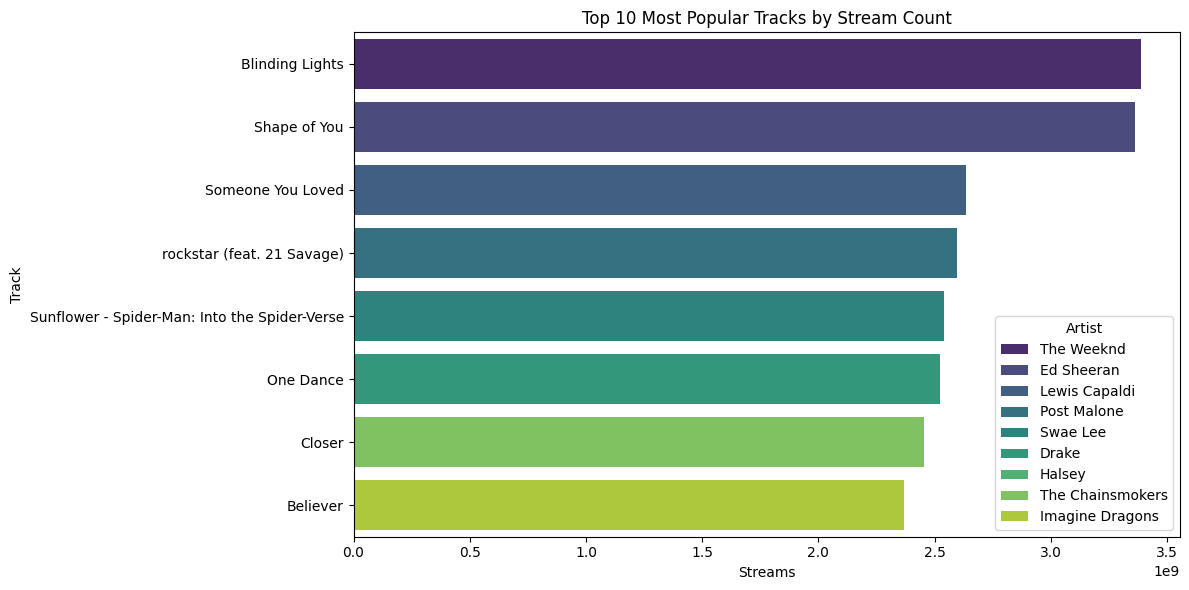

In [10]:
# Plot

plt.figure(figsize=(12, 6))
sns.barplot(data=result, y='Track', x='Stream', hue='Artist', dodge=False, palette='viridis')
plt.title("Top 10 Most Popular Tracks by Stream Count")
plt.xlabel("Streams")
plt.ylabel("Track")
plt.tight_layout()
plt.show()

2. What is the average Stream count for each Album_type?

In [11]:
query = """

SELECT Album_type, ROUND(AVG(Stream), 2) AS avg_streams
FROM spotify
GROUP BY Album_type
ORDER BY avg_streams DESC;


"""

result = run_query(query)
result

,Album_type,avg_streams
0,album,1.468189e+08
1,single,9.896187e+07
2,compilation,7.831555e+07


🎯 Objective: Understand which album types (e.g., Single, Album) drive higher average streams.

/tmp/ipython-input-751398312.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='Album_type', y='avg_streams', palette='coolwarm')


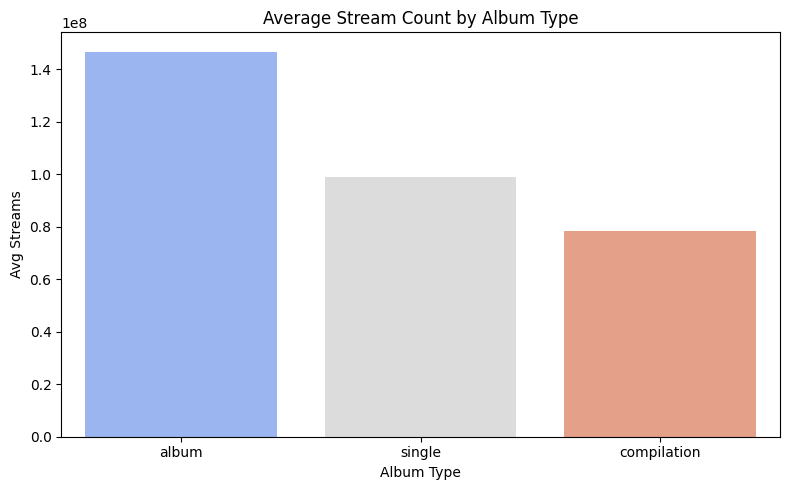

In [12]:
# Plot

plt.figure(figsize=(8, 5))
sns.barplot(data=result, x='Album_type', y='avg_streams', palette='coolwarm')
plt.title("Average Stream Count by Album Type")
plt.ylabel("Avg Streams")
plt.xlabel("Album Type")
plt.tight_layout()
plt.show()

3. Calculate the average Duration_min of tracks for each Album_type.

In [13]:
query = """

SELECT Album_type, ROUND(AVG(Duration_min), 2) AS avg_Duration_min
FROM spotify
GROUP BY Album_type, Track
ORDER BY avg_Duration_min DESC;

"""

result = run_query(query)
result

,Album_type,avg_Duration_min
0,compilation,77.93
1,compilation,76.36
2,single,68.67
3,single,55.68
4,album,24.74
...,...,...
18031,album,0.52
18032,album,0.52
18033,album,0.52
18034,album,0.00


🎯 Objective: Compare track durations across different album types for listener engagement insights.

/tmp/ipython-input-1158017924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=result, x='Album_type', y='avg_Duration_min', jitter=True, palette='Set2')


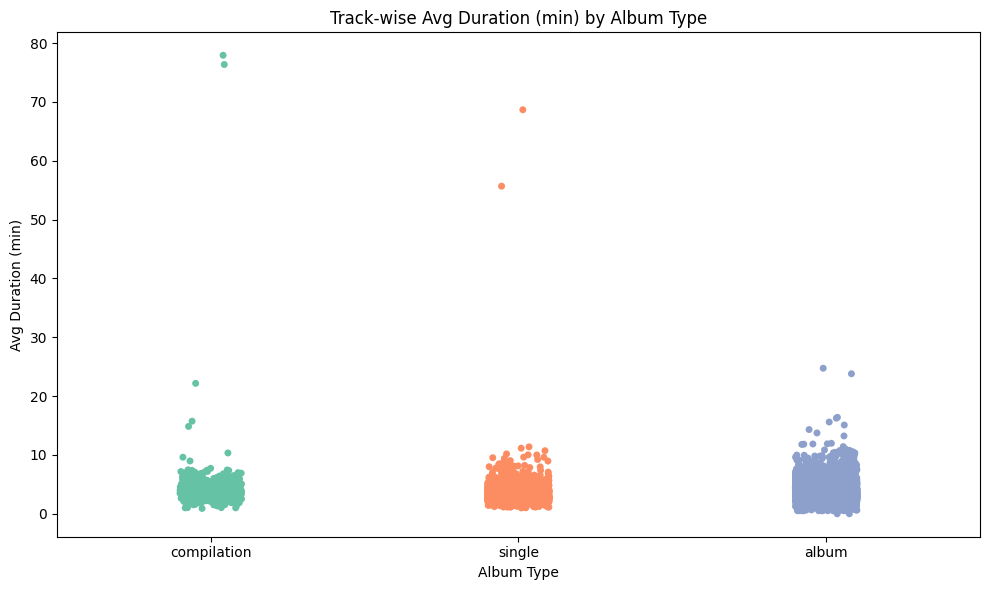

In [14]:
# Plot

plt.figure(figsize=(10, 6))
sns.stripplot(data=result, x='Album_type', y='avg_Duration_min', jitter=True, palette='Set2')
plt.title("Track-wise Avg Duration (min) by Album Type")
plt.ylabel("Avg Duration (min)")
plt.xlabel("Album Type")
plt.tight_layout()
plt.show()

4. List the top 5 tracks with the highest Danceability scores.

In [15]:
query = """

SELECT Track, Artist, Danceability FROM spotify
ORDER BY Danceability DESC
LIMIT 5;

"""

result = run_query(query)
result

,Track,Artist,Danceability
0,Give It To Me,Timbaland,0.975
1,CAN'T TOUCH THIS,BIA,0.975
2,Funky Friday,Dave,0.975
3,Psycho Pass,Xavier Wulf,0.973
4,RIP Young (feat. Project Pat & Juicy J) - Remix,Project Pat,0.971


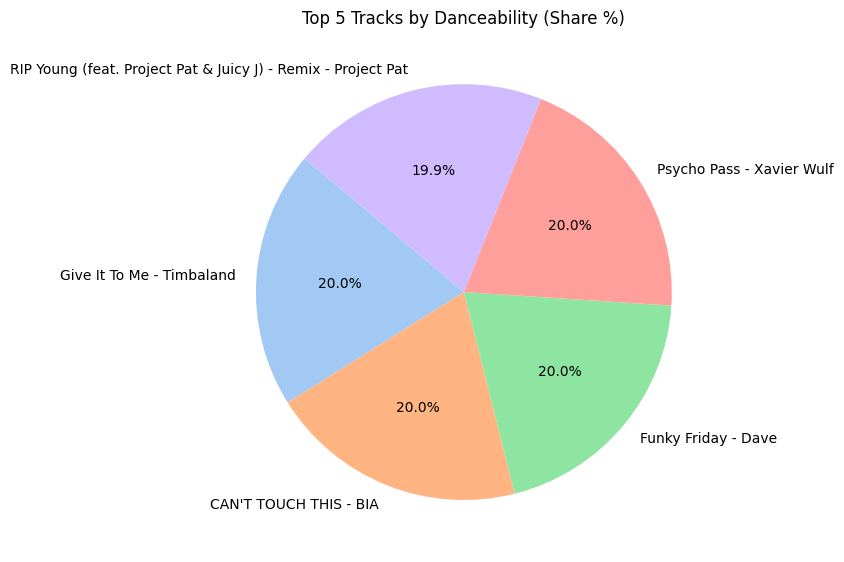

In [17]:
# Combine track and artist name for better pie chart labels
result['Label'] = result['Track'] + " - " + result['Artist']

# Plotting Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(result['Danceability'], labels=result['Label'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Top 5 Tracks by Danceability (Share %)")
plt.tight_layout()
plt.show()

🎯 Objective: Identify the most danceable tracks suitable for party playlists.

5. Find the top 10 most acoustic tracks (Acousticness > 0.8).

In [18]:
query = """

SELECT Track, Artist, Acousticness FROM spotify
WHERE Acousticness > 0.8
ORDER BY Acousticness DESC
LIMIT 10;

"""

result = run_query(query)
result

,Track,Artist,Acousticness
0,"Album for the Young, Op. 39: No. 3. Mamma (Maman)",Pyotr Ilyich Tchaikovsky,0.996
1,You're in Love,Joe Hisaishi,0.996
2,Gnossienne No. 1,Erik Satie,0.996
3,Gnossienne: No. 1,Erik Satie,0.996
4,3 Gymnopédies: No. 1 Lent et douloureux,Erik Satie,0.996
5,"16 Waltzes, Op. 39 (1867 version): No. 15 in A...",Johannes Brahms,0.996
6,"Kinderszenen, Op. 15: No. 1, Von fremden Lände...",Robert Schumann,0.996
7,"Kinderszenen, Op. 15: 1. Von fremden Ländern u...",Robert Schumann,0.996
8,"Kinderszenen, Op. 15: 7. Träumerei",Robert Schumann,0.996
9,"Kinderszenen, Op. 15: No. 10 Fast zu ernst",Robert Schumann,0.996


🎯 Objective: Highlight soft, unplugged-style tracks appealing to acoustic lovers.

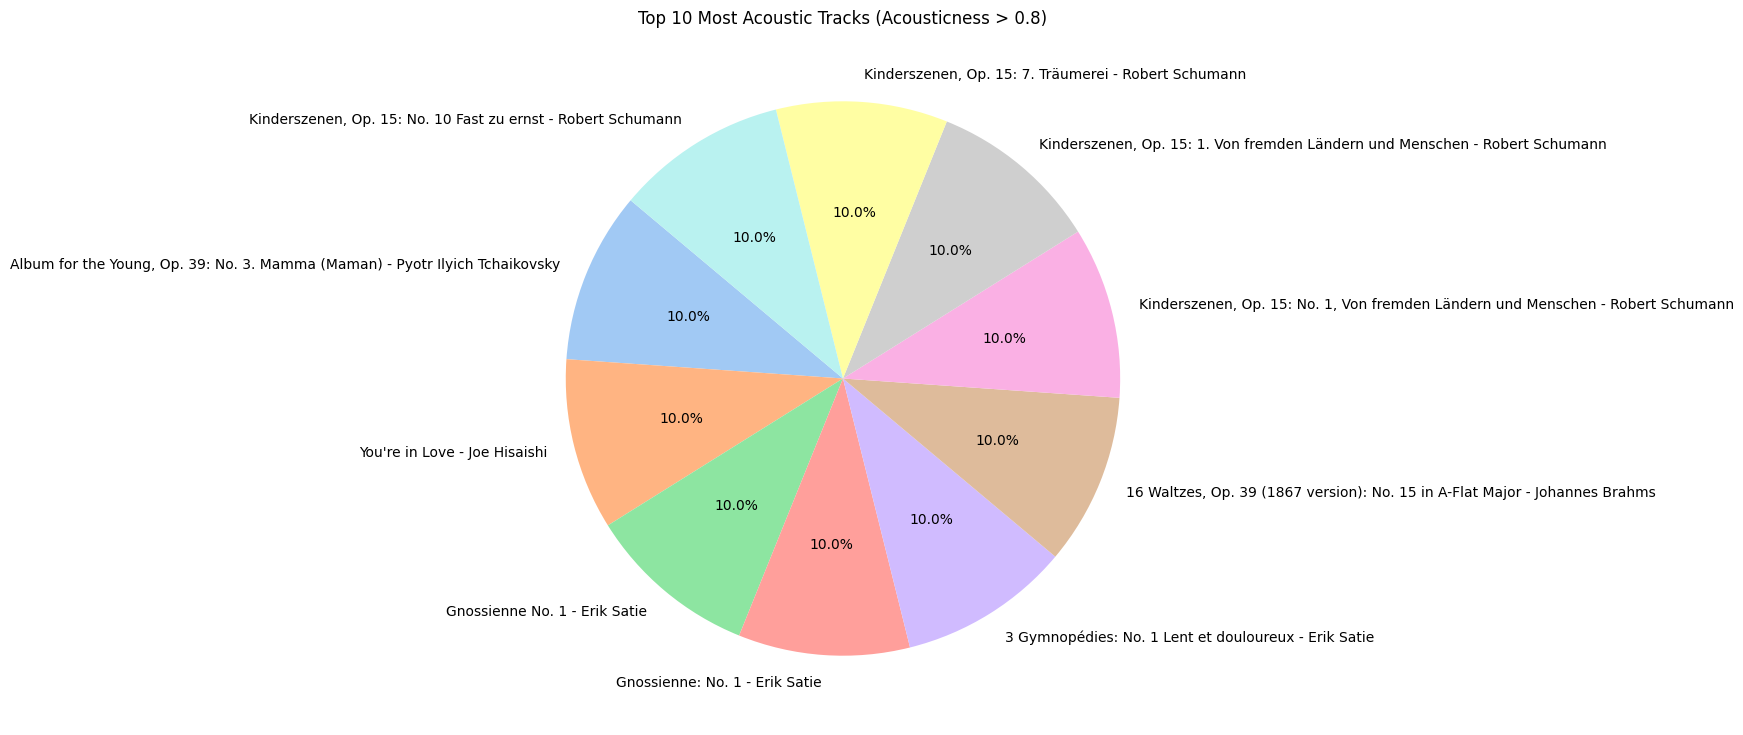

In [19]:
# Create a label combining Track and Artist
result['Label'] = result['Track'] + " - " + result['Artist']

# Plotting Pie Chart
plt.figure(figsize=(9, 9))
plt.pie(result['Acousticness'], labels=result['Label'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Top 10 Most Acoustic Tracks (Acousticness > 0.8)")
plt.tight_layout()
plt.show()

🟡 Medium Level

6. Which 10 artists have the most tracks in the dataset?

/tmp/ipython-input-3570851136.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, y='Artist', x='total_tracks', palette='Blues_d')


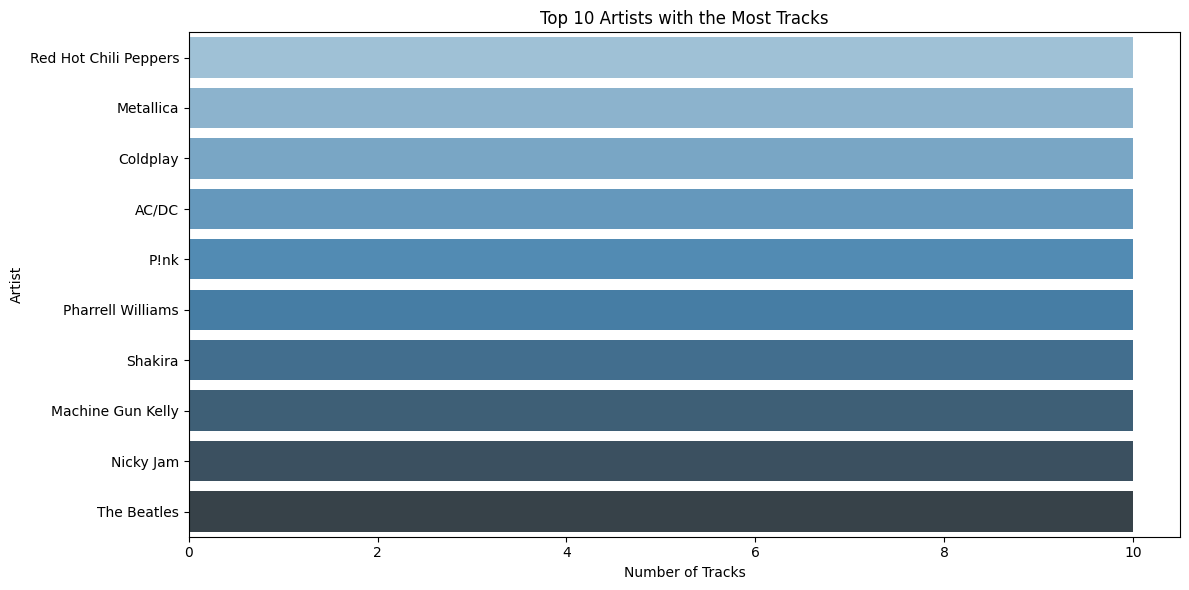

In [20]:
query = """
SELECT Artist, COUNT(*) AS total_tracks
FROM spotify
GROUP BY Artist
ORDER BY total_tracks DESC
LIMIT 10;
"""
result = run_query(query)

plt.figure(figsize=(12, 6))
sns.barplot(data=result, y='Artist', x='total_tracks', palette='Blues_d')
plt.title("Top 10 Artists with the Most Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

🎯 Objective: Discover the most prolific artists in the Spotify dataset.

7. Which Album_type has the highest average Danceability?

/tmp/ipython-input-1473499517.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='Album_type', y='avg_danceability', palette='coolwarm')


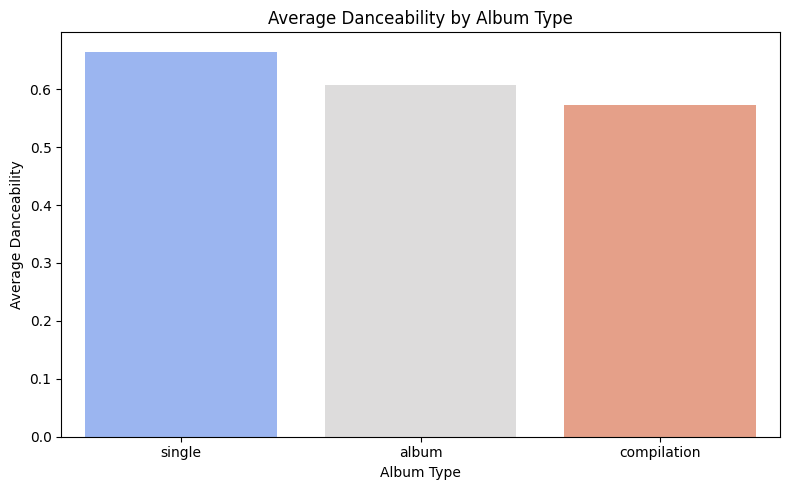

In [21]:
query = """
SELECT Album_type, ROUND(AVG(Danceability), 3) AS avg_danceability
FROM spotify
GROUP BY Album_type
ORDER BY avg_danceability DESC;
"""
result = run_query(query)

plt.figure(figsize=(8, 5))
sns.barplot(data=result, x='Album_type', y='avg_danceability', palette='coolwarm')
plt.title("Average Danceability by Album Type")
plt.xlabel("Album Type")
plt.ylabel("Average Danceability")
plt.tight_layout()
plt.show()

🎯 Objective: Identify which album types are most suitable for dancing.

8. List all tracks with Stream count greater than the overall average.

/tmp/ipython-input-893104554.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='Stream', y='Label', palette='viridis')


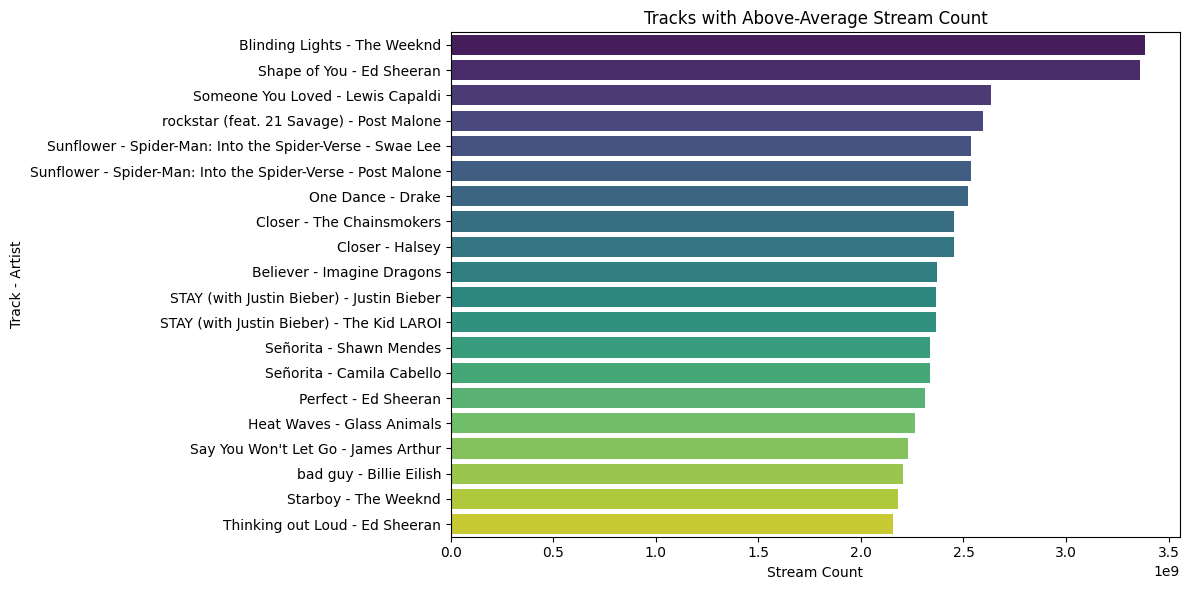

In [22]:
query = """
SELECT Track, Artist, Stream
FROM spotify
WHERE Stream > (SELECT AVG(Stream) FROM spotify)
ORDER BY Stream DESC
LIMIT 20;
"""
result = run_query(query)

# Combine track and artist for better labels
result['Label'] = result['Track'] + " - " + result['Artist']

plt.figure(figsize=(12, 6))
sns.barplot(data=result, x='Stream', y='Label', palette='viridis')
plt.title("Tracks with Above-Average Stream Count")
plt.xlabel("Stream Count")
plt.ylabel("Track - Artist")
plt.tight_layout()
plt.show()

🎯 Objective: Highlight tracks performing better than the platform average.

9. Find artists whose average Duration_min exceeds 5 minutes.

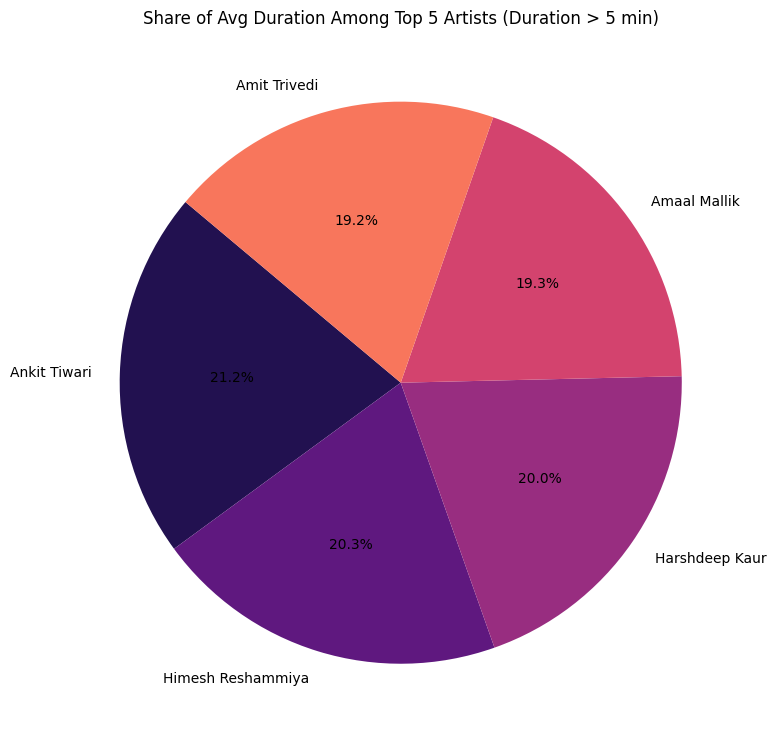

In [23]:
query = """
SELECT Artist, ROUND(AVG(Duration_min), 2) AS avg_duration
FROM spotify
GROUP BY Artist
HAVING AVG(Duration_min) > 5
ORDER BY avg_duration DESC
LIMIT 5;
"""
result = run_query(query)

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(result['avg_duration'], labels=result['Artist'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma'))
plt.title("Share of Avg Duration Among Top 5 Artists (Duration > 5 min)")
plt.tight_layout()
plt.show()

🎯 Objective: Spot artists known for producing long-form or extended tracks.

10. Count how many tracks are marked as official videos.

/tmp/ipython-input-1334515354.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x='Status', y='Count', palette='Set2')


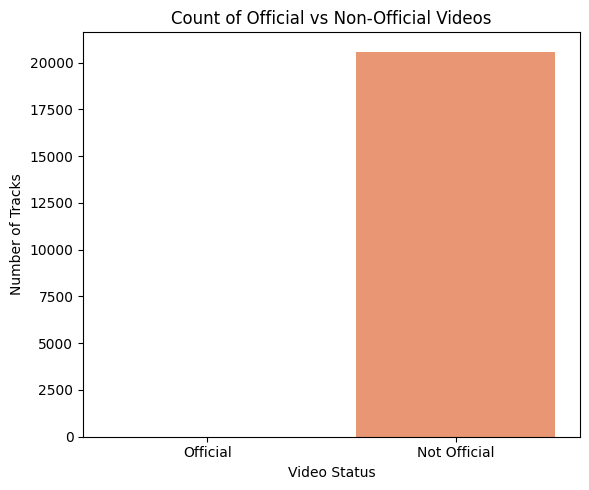

In [24]:
query = """
SELECT
    SUM(CASE WHEN official_video = 'TRUE' THEN 1 ELSE 0 END) AS Official,
    SUM(CASE WHEN official_video != 'TRUE' THEN 1 ELSE 0 END) AS Not_Official
FROM spotify;
"""
result = run_query(query)

# Reshape the result for Seaborn
bar_data = pd.DataFrame({
    'Status': ['Official', 'Not Official'],
    'Count': result.values[0]
})

# Bar Plot
plt.figure(figsize=(6, 5))
sns.barplot(data=bar_data, x='Status', y='Count', palette='Set2')
plt.title("Count of Official vs Non-Official Videos")
plt.ylabel("Number of Tracks")
plt.xlabel("Video Status")
plt.tight_layout()
plt.show()

🔴 Advanced Level

11. What is the average Stream count by most_playedon platform?

/tmp/ipython-input-3240439960.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='most_playedon', y='avg_streams', palette='crest')


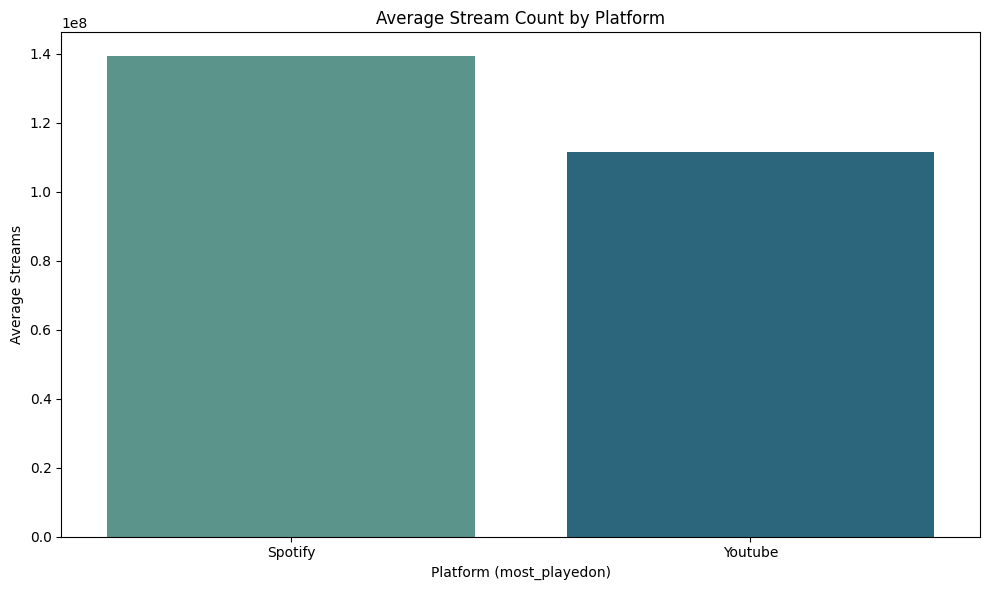

In [25]:
query = """
SELECT most_playedon, ROUND(AVG(Stream), 2) AS avg_streams
FROM spotify
GROUP BY most_playedon
ORDER BY avg_streams DESC;
"""
result = run_query(query)

plt.figure(figsize=(10, 6))
sns.barplot(data=result, x='most_playedon', y='avg_streams', palette='crest')
plt.title("Average Stream Count by Platform")
plt.xlabel("Platform (most_playedon)")
plt.ylabel("Average Streams")
plt.tight_layout()
plt.show()

🎯 Objective: Compare engagement across platforms like Spotify, Apple Music, YouTube, etc.

12. Get the most streamed track in each Album_type using a CTE.

In [26]:
query = """WITH ranked_tracks AS (
  SELECT *,
         RANK() OVER (PARTITION BY Album_type ORDER BY Stream DESC) AS rnk
  FROM spotify
)
SELECT Album_type, Track, Artist, Stream
FROM ranked_tracks
WHERE rnk = 1;"""

result = run_query(query)

result

,Album_type,Track,Artist,Stream
0,single,Closer,Halsey,2.456205e+09
1,single,Closer,The Chainsmokers,2.456205e+09
2,album,Blinding Lights,The Weeknd,3.386520e+09
3,compilation,September,"Earth, Wind & Fire",1.197922e+09


🎯 Objective: Identify top-performing tracks within each album category.

13. Find instrumental tracks (Instrumentalness > 0.8) with Stream count above the Album_type average.

In [27]:
query = """SELECT Artist, Track, Album_type, Instrumentalness
FROM spotify
WHERE Instrumentalness > 0.8 AND Stream >
(SELECT AVG(Stream)
FROM spotify);"""

result = run_query(query)

result

,Artist,Track,Album_type,Instrumentalness
0,Daft Punk,Around the World,album,0.889
1,Ludovico Einaudi,Experience,album,0.961
2,Ludovico Einaudi,Nuvole Bianche,album,0.890
3,Ludovico Einaudi,Una Mattina,album,0.878
4,Hans Zimmer,Cornfield Chase,album,0.982
5,Creedence Clearwater Revival,Up Around The Bend,album,0.823
6,Johann Sebastian Bach,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",album,0.867
7,The Smashing Pumpkins,Bullet With Butterfly Wings - Remastered 2012,album,0.836
8,Ludwig van Beethoven,"Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",album,0.887
9,Cypress Hill,Hits from the Bong,album,0.812


🎯 Objective: Discover standout instrumental tracks outperforming their category average.

14. Show each artist’s track along with a rolling average of Stream counts (window function).

In [28]:
query = """SELECT Artist, Track, Stream,
       ROUND(AVG(Stream) OVER (
         PARTITION BY Artist ORDER BY Stream
         ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
       ), 2) AS rolling_avg_stream
FROM spotify"""

result = run_query(query)

result


,Artist,Track,Stream,rolling_avg_stream
0,Adam Levine,Wings Of Stone,766385.0,766385.00
1,Adam Levine,Yesterday - The Voice Performance,7558089.0,4162237.00
2,Adam Levine,Lifestyle (feat. Adam Levine) - David Guetta S...,13436144.0,7253539.33
3,Adam Levine,Lost Stars - Into The Night Mix,17852008.0,12948747.00
4,Adam Levine,A Higher Place,28446712.0,19911621.33
...,...,...,...,...
20589,surrenderdorothy,"Sometimes,IDontUnderstand",5620855.0,5061416.33
20590,surrenderdorothy,IllLeaveItUpToYou,6419547.0,5639154.00
20591,surrenderdorothy,SittingInTheCar,7808072.0,6616158.00
20592,surrenderdorothy,BeCarefulUpThere,8375049.0,7534222.67


🎯 Objective: Understand how an artist's streaming performance fluctuates over time.

15. Get the first and most recent tracks by each artist based on Views

In [29]:
query = """WITH ranked_tracks AS (
  SELECT
    Artist,
    Track,
    Views,
    ROW_NUMBER() OVER(PARTITION BY Artist ORDER BY Views ASC) AS least_viewed_rank,
    ROW_NUMBER() OVER(PARTITION BY Artist ORDER BY Views DESC) AS most_viewed_rank
  FROM spotify
)
SELECT
  Artist,
  MAX(CASE WHEN least_viewed_rank = 1 THEN Track END) AS least_viewed_track,
  MAX(CASE WHEN least_viewed_rank = 1 THEN Views END) AS least_views,
  MAX(CASE WHEN most_viewed_rank = 1 THEN Track END) AS most_viewed_track,
  MAX(CASE WHEN most_viewed_rank = 1 THEN Views END) AS most_views
FROM ranked_tracks
WHERE least_viewed_rank = 1 OR most_viewed_rank = 1
GROUP BY Artist;"""

result = run_query(query)

result

,Artist,least_viewed_track,least_views,most_viewed_track,most_views
0,11:11 Music Group,Sure Thing (8D sped up),6592.0,"hola como tale tale vu - 1, 2, 3",9509592.0
1,21 Savage,On BS,213119.0,Knife Talk (with 21 Savage ft. Project Pat),74244856.0
2,ATEEZ,Cyberpunk,32252.0,WONDERLAND,116429616.0
3,Afgan,Panah Asmara,47299.0,Jodoh Pasti Bertemu,58531144.0
4,Allman Brothers Band,Ain't Wastin' Time No More,13235.0,Soulshine,19802112.0
...,...,...,...,...,...
2069,Xavier Wulf,Nightshift,11005.0,Thunder Man,10592684.0
2070,Yann Tiersen,Le Matin,132687.0,"Comptine d'un autre été, l'après-midi",35353948.0
2071,Youjeen,Gaja!!!,191.0,Someday,63385.0
2072,Zé Ramalho,Sabiá - Ao Vivo,476049.0,Sinônimos,454833056.0


🎯 Objective: Analyze the popularity evolution of artists by views over time.

16. Which Album_type has the highest average Valence?

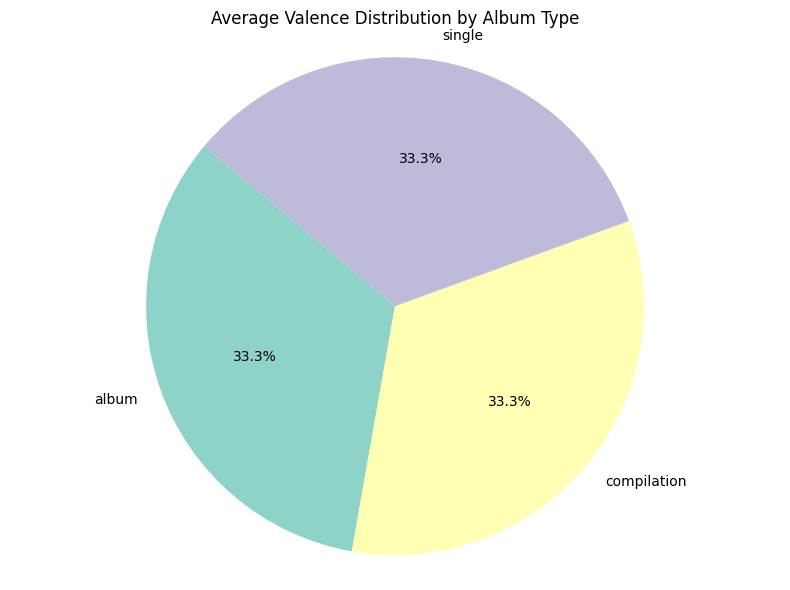

In [30]:
query = """
SELECT Album_type, ROUND(AVG(Valence), 2) AS avg_valence
FROM spotify
GROUP BY Album_type
ORDER BY avg_valence DESC;
"""
result = run_query(query)

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    result['avg_valence'],
    labels=result['Album_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors  # Optional colormap
)
plt.title("Average Valence Distribution by Album Type")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.tight_layout()
plt.show()

🎯 Objective: Discover which album types produce the most “positive” or upbeat music.

17. Find top 10 tracks where both Energy and Liveness are above their overall average.

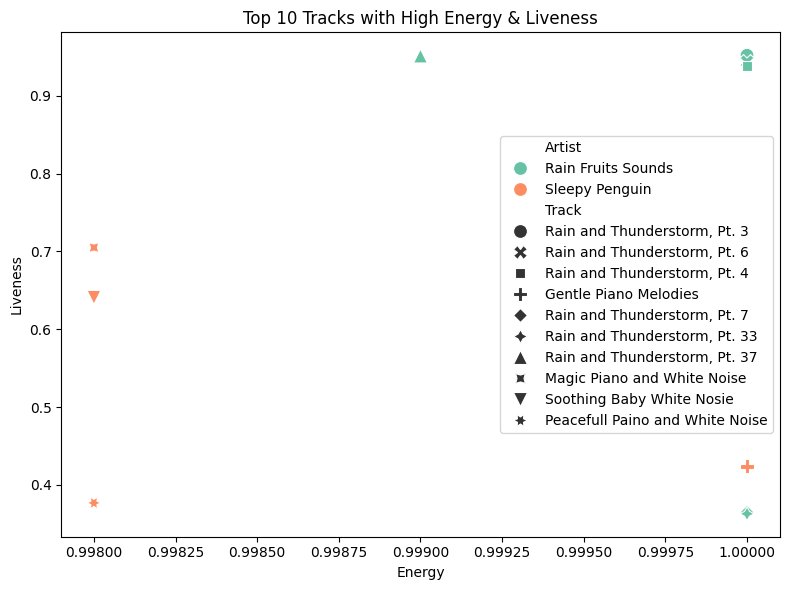

In [31]:
query = """
SELECT Track, Artist, Energy, Liveness
FROM spotify
WHERE Energy > (SELECT AVG(Energy) FROM spotify)
AND Liveness > (SELECT AVG(Liveness) FROM spotify)
ORDER BY Energy DESC, Liveness DESC
LIMIT 10;
"""
result = run_query(query)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=result, x='Energy', y='Liveness', hue='Artist', style='Track', s=100, palette='Set2')
plt.title("Top 10 Tracks with High Energy & Liveness")
plt.xlabel("Energy")
plt.ylabel("Liveness")
plt.tight_layout()
plt.show()

🎯 Objective: Surface high-energy live-style tracks that captivate audiences.

18. Rank tracks by Stream count within each Album_type.

In [32]:
query = """

SELECT
	Album_type,
    Track,
    Artist,
    Stream,
    RANK() OVER(PARTITION BY Album_type ORDER BY Stream DESC) AS rank_within_album
FROM spotify;

"""

result = run_query(query)

result

,Album_type,Track,Artist,Stream,rank_within_album
0,album,Blinding Lights,The Weeknd,3.386520e+09,1
1,album,Shape of You,Ed Sheeran,3.362005e+09,2
2,album,Someone You Loved,Lewis Capaldi,2.634013e+09,3
3,album,rockstar (feat. 21 Savage),Post Malone,2.594927e+09,4
4,album,Sunflower - Spider-Man: Into the Spider-Verse,Swae Lee,2.538330e+09,5
...,...,...,...,...,...
20589,single,Hello (feat. Dragonette),Martin Solveig,0.000000e+00,4820
20590,single,Intoxicated,Martin Solveig,0.000000e+00,4820
20591,single,Intoxicated - Radio Edit,Martin Solveig,0.000000e+00,4820
20592,single,Wonderful Life - Edit,Two Door Cinema Club,0.000000e+00,4820


🎯 Objective: Benchmark track performance relative to similar album types.

19. How many tracks were released by each Channel?

In [33]:
query = """
SELECT Channel, COUNT(*) AS total_tracks
FROM spotify
GROUP BY Channel
ORDER BY total_tracks DESC;
"""
result = run_query(query)

result

,Channel,total_tracks
0,0,469
1,T-Series,238
2,SonyMusicIndiaVEVO,95
3,SonyMusicSouthVEVO,83
4,Zee Music Company,65
...,...,...
6668,KPOPLAND SUBITA,1
6669,CTCVisuals,1
6670,itsme finaa,1
6671,LE SSERAFIM,1


🎯 Objective: Identify which publishing channels are most active on the platform.

20. Which most_playedon platform had the highest average Stream count?

/tmp/ipython-input-39766323.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='most_playedon', y='avg_stream_count', palette='light:#5A9')


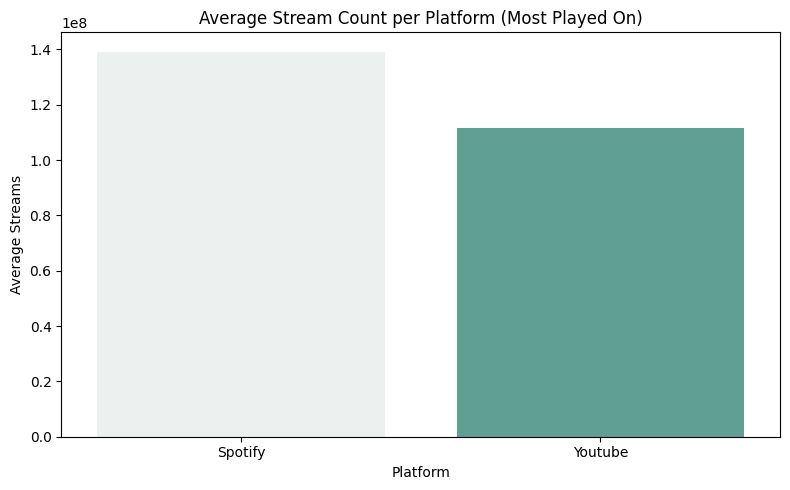

In [34]:
query = """
SELECT most_playedon, ROUND(AVG(Stream), 2) AS avg_stream_count
FROM spotify
GROUP BY most_playedon
ORDER BY avg_stream_count DESC;
"""
result = run_query(query)

plt.figure(figsize=(8, 5))
sns.barplot(data=result, x='most_playedon', y='avg_stream_count', palette='light:#5A9')
plt.title("Average Stream Count per Platform (Most Played On)")
plt.xlabel("Platform")
plt.ylabel("Average Streams")
plt.tight_layout()
plt.show()

🔍 Key Takeaways:¶
Identified top-streamed tracks and artists, highlighting trends in audience popularity.

Analyzed Album types (e.g., Singles, Albums) to understand their impact on engagement metrics such as average stream count, duration, and danceability.

Evaluated performance by listening platform (most_playedon) to help inform content distribution strategies.

Discovered niche music styles such as acoustic and instrumental tracks that exceeded average genre expectations.

Applied window functions and ranking techniques to uncover artist growth patterns and track-level performance.

  In conclusion, this SQL project demonstrates how structured data analysis can turn raw music metrics into meaningful, actionable insights—powering better decision-making in the digital music industry.